In [81]:

import pandas as pd
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

print(f"Pandas Version {pd.__version__}")
print(f"Tensorflow Version {tf.__version__}")


df = pd.read_excel("DataSetTB3_SHARE.xlsx",engine = "openpyxl")


df.iloc[:,2:] = df.iloc[:,2:] / 255.  



X = df.drop("label",axis=1).iloc[:,:] 
Y = df.iloc[:,1] 

def shuffle(X,Y,test_size):
    shuffleIndx = int(len(X) * test_size)
    X_train = X[shuffleIndx:]
    Y_train = Y[shuffleIndx:]

    X_test = X[:shuffleIndx]
    Y_test = Y[:shuffleIndx]

    return X_train,X_test,Y_train,Y_test
x_train,x_test,y_train,y_test = train_test_split(X, Y , test_size = 0.3,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
def getAcc(y_true,y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

Pandas Version 1.1.5
Tensorflow Version 2.1.0
(700, 785)
(300, 785)
(700,)
(300,)


In [47]:
x_train

,idData,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
742,743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
676,677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
571,572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527,528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
class KNN():
    """
    Class for using 

    """
    def __init__(self,n_neighbors):
        self.n_neighbors =  n_neighbors
        self.x_train = []
        self.y_train = []

    def euclidean_distance(self, x_train_obs, x_test_obs):
        return np.sqrt(np.sum( (x_train_obs - x_test_obs)**2,axis=0)) 
    
    def manhattanDistance(self, x_train_obs,x_test_obs):
        return np.sum(np.abs(x_train_obs - x_test_obs),axis=0)
    
    def minkowskiDistance(self, x_train_obs,x_test_obs,p):
        x = np.sum(np.abs(x_train_obs - x_test_obs),axis=0)
        
        def oneDivP(x): 
                return x ** 1/p
        return oneDivP(x)
    
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
    
    def counterTheMost(self, labels):
        counterItM8 = {key:0 for key in set(labels)}
        for label in labels:
            if label in counterItM8.keys():
                counterItM8[label] += 1
        
        return sorted(counterItM8.items(),key=lambda x : x[1])[0][0]

    def predict(self,x_test):
        y_pred= [self.do_calculation(x) for x in x_test]
        return np.array(y_pred,dtype=np.int32)

    def do_calculation(self,x_test_obs):
        distanceMinkowski = [self.minkowskiDistance(x_train_obs,x_test_obs,5) for x_train_obs in self.x_train]   
        distanceEuclidean = [self.euclidean_distance(x_train_obs,x_test_obs) for x_train_obs in self.x_train]   
        distanceManhattan = [self.manhattanDistance(x_train_obs, x_test_obs) for x_train_obs in self.x_train]
        
        #Get The Lowest Distances index
        lowestDistancesMinkowski = np.argsort(distanceMinkowski)[:self.n_neighbors]
        lowestDistancesEuclidean = np.argsort(distanceEuclidean)[:self.n_neighbors]
        lowestDistancesManhattan = np.argsort(distanceManhattan)[:self.n_neighbors]
        # get the labels :
        labelsMinkowski = [self.y_train[indx] for indx in lowestDistancesMinkowski]
        labelsEuclidean = [self.y_train[indx] for indx in lowestDistancesEuclidean]
        labelsManhattan = [self.y_train[indx] for indx in lowestDistancesManhattan]
        
        return self.counterTheMost(labelsMinkowski), self.counterTheMost(labelsEuclidean), self.counterTheMost(labelsManhattan)


In [88]:
dfResult =pd.DataFrame(columns=["akurasiManhattanTrain","akurasiManhattanTest",
                                "akurasiEuclideanTrain","akurasiEuclideanTest",
                                "akurasiMinkowskiTrain","akurasiMinkowskiTest"],index=range(8))

for i in range(2,10,1):

    print(f"sek : {i}")
    x_predicted = pd.DataFrame(columns=["idData","label"])
    x_predicted["idData"] = x_train["idData"]
    x_predicted["label"] = y_train
    x_predicted["manhattan"] = np.nan
    x_predicted["euclidean"] = np.nan
    x_predicted["minkowski"] = np.nan
    knnOBJ = KNN(i)
    knnOBJ.fit(np.array(x_train,dtype=np.float32), np.array(y_train,dtype=np.float32))
    ypred = knnOBJ.predict(np.array(x_train,dtype=np.float32))

    x_predicted["minkowski"] = ypred[:,0]
    x_predicted["manhattan"] = ypred[:,1]
    x_predicted["euclidean"] = ypred[:,2]
    ypred = knnOBJ.predict(np.array(x_train,dtype=np.float32))
    
    dfResult.loc[i - 1,'akurasiManhattanTrain'] = getAcc(y_train,ypred[:,2])
    dfResult.loc[i - 1, "akurasiEuclideanTrain"] = getAcc(y_train,ypred[:,1])
    dfResult.loc[i - 1,"akurasiMinkowskiTrain"] = getAcc(y_train,ypred[:,0])

    y_predTest = knnOBJ.predict(np.array(x_test,dtype=np.float32))
    dfResult.loc[i - 1,"akurasiManhattanTest"] = getAcc(y_test,y_predTest[:,2])
    dfResult.loc[i - 1,"akurasiEuclideanTest"]= getAcc(y_test,y_predTest[:,1])
    dfResult.loc[i - 1,"akurasiMinkowskiTest"] = getAcc(y_test,y_predTest[:,0])

sek : 2
sek : 3
sek : 4
sek : 5
sek : 6
sek : 7
sek : 8
sek : 9


In [95]:
dfResult.index=["Apa Nihh, neighbors","n: 2",
               "n: 3","n: 4","n: 5",
               "n: 6", "n: 7", "n : 8","n: 9" ]

In [127]:
dfResult.fillna("Pram Ganteng .",inplace=True)
dfResult

,akurasiManhattanTrain,akurasiManhattanTest,akurasiEuclideanTrain,akurasiEuclideanTest,akurasiMinkowskiTrain,akurasiMinkowskiTest
"Apa Nihh, neighbors",Pram Ganteng .,Pram Ganteng .,Pram Ganteng .,Pram Ganteng .,Pram Ganteng .,Pram Ganteng .
n: 2,0.994286,0.996667,0.997143,0.986667,0.994286,0.996667
n: 3,0.991429,0.986667,0.985714,0.96,0.991429,0.986667
n: 4,0.981429,0.98,0.982857,0.95,0.981429,0.98
n: 5,0.962857,0.956667,0.977143,0.946667,0.962857,0.956667
n: 6,0.951429,0.94,0.964286,0.94,0.951429,0.94
n: 7,0.938571,0.93,0.952857,0.933333,0.938571,0.93
n : 8,0.924286,0.9,0.94,0.916667,0.924286,0.9
n: 9,0.914286,0.873333,0.922857,0.9,0.914286,0.873333


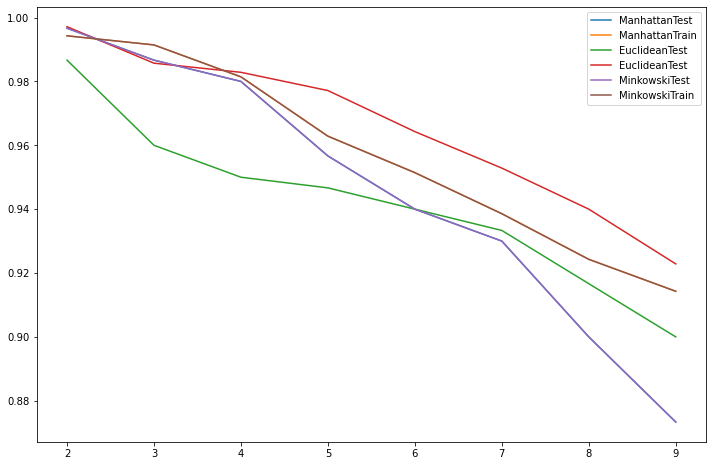

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.lineplot(y = map(float,dfResult["akurasiManhattanTest"].values),x = range(1,10),label="ManhattanTest")
sns.lineplot(y = map(float,dfResult["akurasiManhattanTrain"].values),x = range(1,10),label="ManhattanTrain")

sns.lineplot(y = map(float,dfResult["akurasiEuclideanTest"].values),x = range(1,10),label="EuclideanTest")
sns.lineplot(y = map(float,dfResult["akurasiEuclideanTrain"].values),x = range(1,10),label="EuclideanTest")


sns.lineplot(y = map(float,dfResult["akurasiMinkowskiTest"].values),x = range(1,10),label="MinkowskiTest")
sns.lineplot(y = map(float,dfResult["akurasiMinkowskiTrain"].values),x = range(1,10),label="MinkowskiTrain")

plt.legend(loc='best')

In [64]:

print(getAcc(y_train ,ypred))
ypred = knnOBJ.predict(np.array(x_test,dtype=np.float32))
print(getAcc(y_test,ypred))

0.0
0.0
